<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/raw/master/img/logo_amds.png" alt="Logo" style="width: 128px;"/>

# AmsterdamUMCdb - Freely Accessible ICU Database

version 1.0.1 January 2020  
Copyright &copy; 2003-2020 Amsterdam UMC - Amsterdam Medical Data Science

# <a id='listitems'></a>listitems table
The *listitems* table contains all categorical observations, e.g. based on a selection from a list, like type of heart rhytm, ventilatory mode, etc. All items have an associated admissionid from the [admissions](admissions.ipynb#admissions) table.

This table also contains the [reason for ICU admission](#apache), according to the APACHE II or IV diagnostic codes.

## Fields

|Name|Type|Description|
|:---|:---|:---|
|admissionid|integer|links the items with the admissionid in the [admissions](admissions.ipynb#admissions) table|
|[itemid](#itemid)|integer|id to identify the type of observation|
|[item](#item)|string|type of observation|
|[value](#value)|string|value of this observation|
|measuredat|integer|time associated with this observation in milliseconds since the first admission. Negative results imply that the sample was drawn before the first ICU admission|
|registeredat|integer|time the result was saved in the database in milliseconds since the first admission. Negative results imply that the sample was drawn before the first ICU admission.|
|registeredby|string|user group that documented the observation, e.g. nurses, physicians or NULL for linked devices|
|updatedat|integer|time of updating the observation in milliseconds since first admission|
|updatedby|string|user group that documented the observation, e.g. nurses, physicians or NULL for linked devices|
|islabresult|boolean|determines whether the observation is a labresult. Currently, only item 'Afnameplaats' is a labresult, used to determine the location of sample drawing during down-time of the lab or hospital system.|

# Example Python and SQL scripts

## Imports

In [1]:
%matplotlib inline
#gets the module from the repository for use in Colab
import os.path
try:
  if not os.path.isfile('amsterdamumcdb.py'):
    !wget https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
finally:
    import amsterdamumcdb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import io
from IPython.display import display, HTML, Markdown

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

--2020-01-30 20:10:03--  https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2899 (2.8K) [text/plain]
Saving to: ‘amsterdamumcdb.py’

amsterdamumcdb.py   100%[===================>]   2.83K  --.-KB/s    in 0s      

2020-01-30 20:10:03 (80.2 MB/s) - ‘amsterdamumcdb.py’ saved [2899/2899]



## Display settings

In [0]:
#matplotlib settings for image size
#needs to be in a different cell from %matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.dpi"] = 144
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 12

pd.options.display.max_columns = None
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 1000

## Connection settings

In [0]:
auth.authenticate_user()

project_id='milandaticu2020'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
os.environ["GOOGLE_CLOUD_PROJECT"]

config = {'query': 
          {'defaultDataset': {
              "datasetId": 'amsterdamumcdb_v_1_0_1', 
              "projectId": 'amsterdamumcdb-data' 
              }
           }
          }

## Overview of all fields

In [4]:
sql = """
SELECT * FROM listitems LIMIT 10;
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT * FROM listitems LIMIT 10;

```

,admissionid,itemid,item,valueid,value,measuredat,registeredat,registeredby,updatedat,updatedby,islabresult
0,2,13116,D_Thoraxchirurgie_CABG en Klepchirurgie,10,Gecombineerde hartchirurgie,1320000,1380000,ICV_Medisch,1380000,ICV_Medisch,0
1,4,12128,Patiënt Specialisme,1,CCH - Cardiochirurgie,6180000,9778000,ICV_Coassistent,9778000,ICV_Coassistent,0
2,5,19606,BPS - Acceptatie beademing,1,Toestaan van bewegingen,23220000,23580000,ICV_IC-Verpleegkundig,23580000,ICV_IC-Verpleegkundig,0
3,10,15710,Pat_Ontslag_Instructies_Controles,2,"Ja, was reeds in orde",62040000,62040000,ANES_Anesthesiologie,62040000,ANES_Anesthesiologie,0
4,12,7432,Afnameplaats,1,Arterieel,29700000,32400000,ICV_IC-Verpleegkundig,32400000,ICV_IC-Verpleegkundig,1
5,12,8898,Reactie op Uitzuigen,6,Hypertensie,206100000,205920000,ICV_IC-Verpleegkundig,205920000,ICV_IC-Verpleegkundig,0
6,14,8652,Pulsaties Re-been,2,Hoorbaar (Doppler),208667340000,208672980000,ICV_IC-Verpleegkundig,208672980000,ICV_IC-Verpleegkundig,0
7,17,15710,Pat_Ontslag_Instructies_Controles,3,"Ja, na doornemen checklist",83100000,83100000,ICV_Physician assistant,83100000,ICV_Physician assistant,0
8,21,8692,Thoraxdrain2 Zuigkracht,2,- 10 cm H2O,114540000,116340000,ICV_IC-Verpleegkundig,116340000,ICV_IC-Verpleegkundig,0
9,28,18619,MC NAS Administratieve en management taken,1,"Het verrichten van routinewerkzaamheden zoals het verwerken van klinische gegevens, onderzoeken afspreken, overdrachten",76080000,76200000,ICV_MC-Verpleegkundig,76200000,ICV_MC-Verpleegkundig,0


In [5]:
sql = """
SELECT COUNT(*) AS Number_of_unique_observations FROM (
    SELECT DISTINCT admissionid, itemid, measuredat
    FROM listitems
    ) as unique_items_table
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT COUNT(*) AS Number_of_unique_observations FROM (
    SELECT DISTINCT admissionid, itemid, measuredat
    FROM listitems
    ) as unique_items_table

```

,Number_of_unique_observations
0,29935545


In [6]:
sql = """
SELECT COUNT(*) AS Number_of_observations 
FROM listitems
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT COUNT(*) AS Number_of_observations 
FROM listitems

```

,Number_of_observations
0,31072879


## <a id='itemid'></a>itemid

In [7]:
sql = """
SELECT admissionid, itemid, measuredat, value
FROM listitems
GROUP BY admissionid, itemid, measuredat, value
HAVING COUNT(*) > 1
LIMIT 5
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT admissionid, itemid, measuredat, value
FROM listitems
GROUP BY admissionid, itemid, measuredat, value
HAVING COUNT(*) > 1
LIMIT 5

```

,admissionid,itemid,measuredat,value
0,20538,6734,48180000,Spastische reactie (terugtrekken)
1,1421,6734,59340000,Volgt verbale commando's op
2,7906,6734,383520000,Volgt verbale commando's op
3,4549,6734,1509780000,Volgt verbale commando's op
4,13267,6734,2238960000,Volgt verbale commando's op


In [8]:
sql = """
SELECT t1.*
FROM listitems t1
JOIN (
    SELECT admissionid, itemid, measuredat
    FROM listitems
    GROUP BY admissionid, itemid, measuredat
    HAVING COUNT(*) > 1
    ) t2 
ON t1.admissionid = t2.admissionid AND t1.itemid = t2.itemid AND t1.measuredat = t2.measuredat
ORDER BY t1.admissionid, t1.itemid, t1.measuredat
LIMIT 10
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT t1.*
FROM listitems t1
JOIN (
    SELECT admissionid, itemid, measuredat
    FROM listitems
    GROUP BY admissionid, itemid, measuredat
    HAVING COUNT(*) > 1
    ) t2 
ON t1.admissionid = t2.admissionid AND t1.itemid = t2.itemid AND t1.measuredat = t2.measuredat
ORDER BY t1.admissionid, t1.itemid, t1.measuredat
LIMIT 10

```

,admissionid,itemid,item,valueid,value,measuredat,registeredat,registeredby,updatedat,updatedby,islabresult
0,0,6671,Hartritme,1,NSR,126720000,133680000,ICV_IC-Verpleegkundig,133680000,ICV_IC-Verpleegkundig,0
1,0,6671,Hartritme,22,SVT,126720000,133680000,ICV_IC-Verpleegkundig,133680000,ICV_IC-Verpleegkundig,0
2,0,12611,Sonde maat,1,14,20520000,22644000,ICV_IC-Verpleegkundig,22644000,ICV_IC-Verpleegkundig,0
3,0,12611,Sonde maat,1,14,20520000,22620000,ICV_IC-Verpleegkundig,22620000,ICV_IC-Verpleegkundig,0
4,0,12623,Tube diepte,3,21,20520000,22668000,ICV_IC-Verpleegkundig,22668000,ICV_IC-Verpleegkundig,0
5,0,12623,Tube diepte,3,21,20520000,22620000,ICV_IC-Verpleegkundig,22620000,ICV_IC-Verpleegkundig,0
6,0,12810,Bedsoort,1,Standaard matras,20520000,22680000,ICV_IC-Verpleegkundig,22680000,ICV_IC-Verpleegkundig,0
7,0,12810,Bedsoort,1,Standaard matras,20520000,22691000,ICV_IC-Verpleegkundig,22691000,ICV_IC-Verpleegkundig,0
8,0,12810,Bedsoort,1,Standaard matras,58320000,58440000,ICV_IC-Verpleegkundig,58440000,ICV_IC-Verpleegkundig,0
9,0,12810,Bedsoort,1,Standaard matras,58320000,58478000,ICV_IC-Verpleegkundig,58478000,ICV_IC-Verpleegkundig,0


In [9]:
sql = """
SELECT *
FROM listitems
WHERE admissionid = 2863 AND
    itemid = 8895 AND
    measuredat = 4016700000;
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT *
FROM listitems
WHERE admissionid = 2863 AND
    itemid = 8895 AND
    measuredat = 4016700000;

```

,admissionid,itemid,item,valueid,value,measuredat,registeredat,registeredby,updatedat,updatedby,islabresult
0,2863,8895,Kleur Sputum,9,Spoor bloed,4016700000,4033140000,ICV_IC-Verpleegkundig,4033140000,ICV_IC-Verpleegkundig,0
1,2863,8895,Kleur Sputum,6,Purulent,4016700000,4033140000,ICV_IC-Verpleegkundig,4033140000,ICV_IC-Verpleegkundig,0


## <a id='item'></a>item

In [10]:
sql = """
SELECT item, COUNT(itemid) AS number_of_observations, itemid
FROM listitems
GROUP BY item, itemid
ORDER BY number_of_observations DESC
LIMIT 20; 
"""
import matplotlib as mpl
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT item, COUNT(itemid) AS number_of_observations, itemid
FROM listitems
GROUP BY item, itemid
ORDER BY number_of_observations DESC
LIMIT 20; 

```

,item,number_of_observations,itemid
0,Ventilatie Mode (Set),15703369,12290
1,MFT_Behandeling,2186881,14846
2,Hartritme,2054619,6671
3,Houding patiënt,1081571,9233
4,Toedieningsweg,661671,8189
5,NIV Program Status (Set),375439,12560
6,Kleur Sputum,369756,8895
7,Aantal Bronchiaaltoilet,289388,8889
8,Hoeveelheid Sputum,270172,8894
9,Hoestprikkel,258805,8899


``` mysql

SELECT item, COUNT(itemid) AS number_of_observations, itemid
FROM listitems
GROUP BY item, itemid
ORDER BY number_of_observations DESC
LIMIT 20

```

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

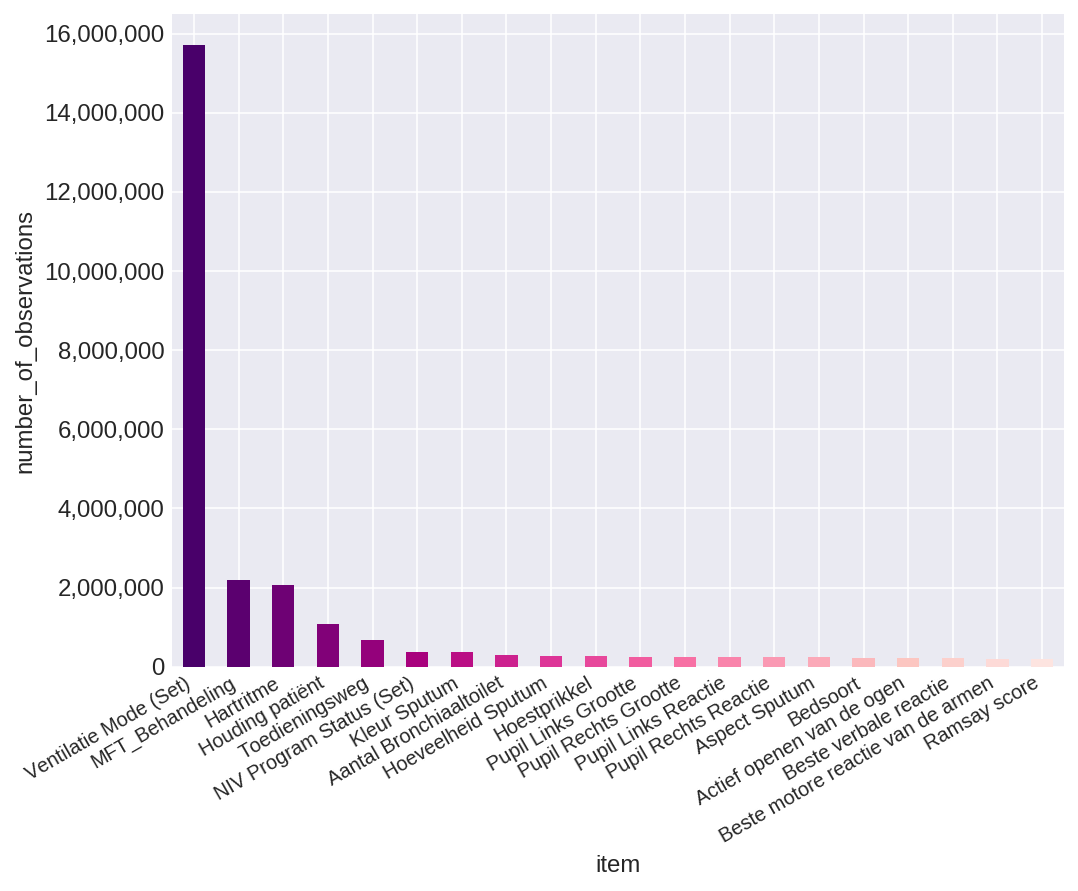

In [11]:
sql = """
SELECT item, COUNT(itemid) AS number_of_observations, itemid
FROM listitems
GROUP BY item, itemid
ORDER BY number_of_observations DESC
LIMIT 20
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='small')

## <a id='value'></a>value

``` mysql

SELECT value, COUNT(itemid) AS number_of_observations
FROM listitems
WHERE itemid = 12290 --ventilation mode
GROUP BY value, item, itemid
ORDER BY number_of_observations DESC
LIMIT 5 

```

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

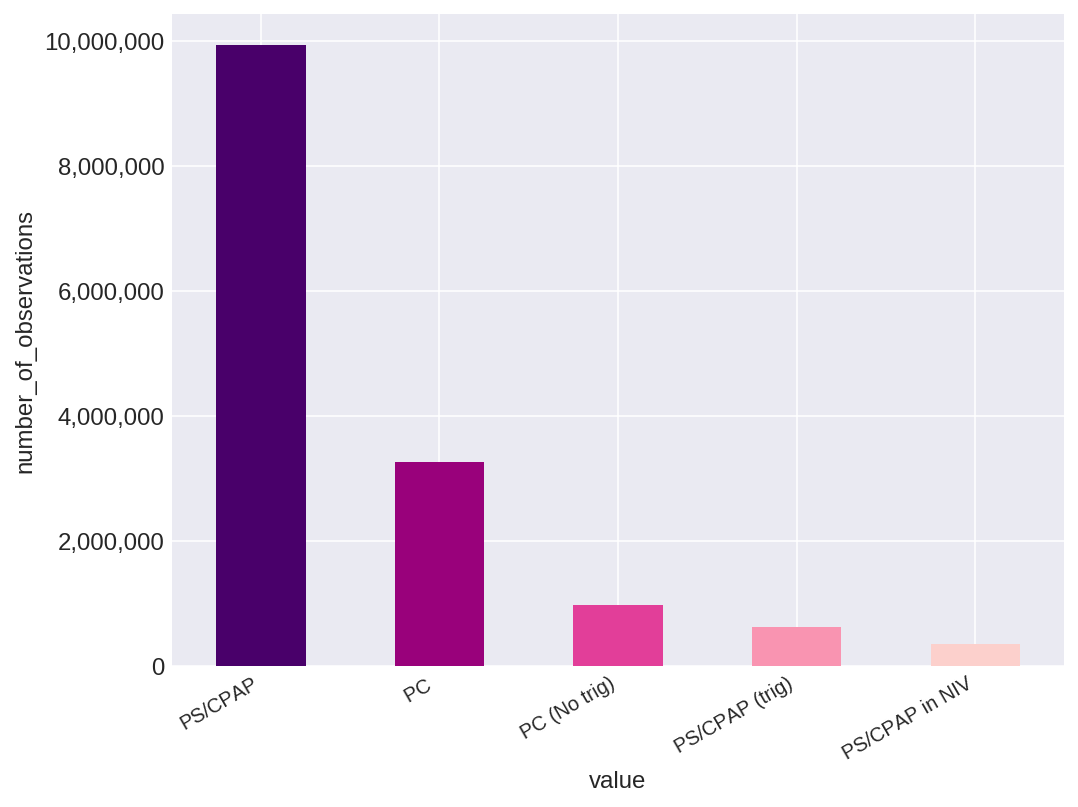

In [12]:
#shows the most often used ventilator mode: itemid = 12290 #ventilation mode
sql = """
SELECT value, COUNT(itemid) AS number_of_observations
FROM listitems
WHERE itemid = 12290 --ventilation mode
GROUP BY value, item, itemid
ORDER BY number_of_observations DESC
LIMIT 5 
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='small')

``` mysql

SELECT value, COUNT(itemid) AS number_of_observations
FROM listitems
WHERE itemid = 6671 --heart rhythm
GROUP BY value, item, itemid
ORDER BY number_of_observations DESC
LIMIT 5 

```

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

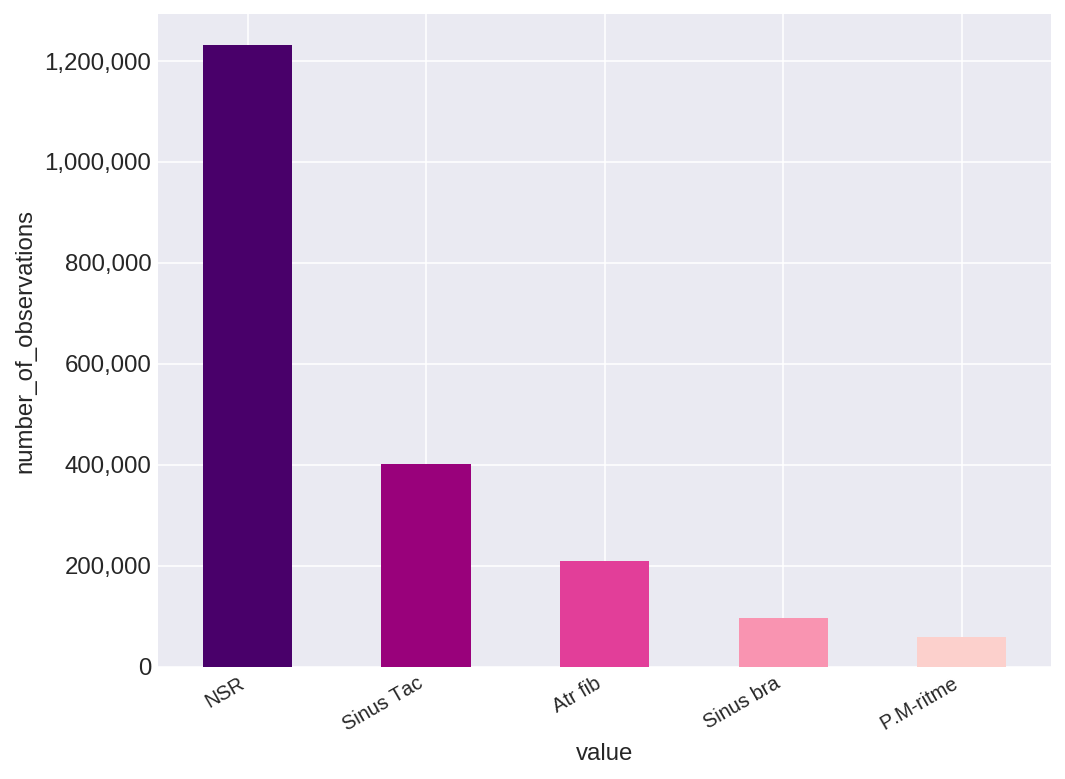

In [13]:
#shows the most often used heart rhytms mode: itemid = 6671 --heart rhythm
sql = """
SELECT value, COUNT(itemid) AS number_of_observations
FROM listitems
WHERE itemid = 6671 --heart rhythm
GROUP BY value, item, itemid
ORDER BY number_of_observations DESC
LIMIT 5 
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='small')

# <a id='apache'></a> Reason for ICU admission (based on pre-APACHE, APACHE II or IV admission diagnosis)

## Reason for admission based on pre-APACHE/APACHE II or IV diagnosis

In [14]:
sql = """
WITH diagnosis_groups AS (
SELECT admissionid,
        item, 
        value as diagnosis_group,
        CASE
            WHEN itemid = 13110 AND valueid BETWEEN 1 AND 3 THEN 1 --D_Hoofdgroep
            WHEN itemid = 16651 AND valueid BETWEEN 7 AND 9 THEN 1 --DMC_Hoofdgroep
            WHEN itemid = 16997 AND valueid BETWEEN 11 AND 20 THEN 1 --APACHE IV Groepen
            WHEN itemid = 18588 AND valueid BETWEEN 1 AND 7 THEN 1 --Apache II Hoofdgroep
            ELSE 0
        END AS surgical,
        ROW_NUMBER() OVER(PARTITION BY admissionid
        ORDER BY measuredat DESC) AS rownum
    FROM listitems
    WHERE itemid IN (
        --MAIN GROUP - LEVEL 0
        13110, --D_Hoofdgroep
        16651, --DMC_Hoofdgroep, Medium Care
        
        18588, --Apache II Hoofdgroep
        16997 --APACHE IV Groepen
        
    )
),diagnosis_subgroups AS (
SELECT admissionid,
        item, 
        value as diagnosis_subgroup,
        ROW_NUMBER() OVER(PARTITION BY admissionid
        ORDER BY measuredat DESC) AS rownum
    FROM listitems
    WHERE itemid IN (
        --SUB GROUP - LEVEL 1
        13111, --D_Subgroep_Thoraxchirurgie
        16669, --DMC_Subgroep_Thoraxchirurgie
        13112, --D_Subgroep_Algemene chirurgie
        16665, --DMC_Subgroep_Algemene chirurgie
        13113, --D_Subgroep_Neurochirurgie
        16667, --DMC_Subgroep_Neurochirurgie
        13114, --D_Subgroep_Neurologie
        16668, --DMC_Subgroep_Neurologie
        13115, --D_Subgroep_Interne geneeskunde
        16666 --DMC_Subgroep_Interne geneeskunde
    )
), diagnoses AS (
SELECT admissionid,
        item, 
        value as diagnosis,
        ROW_NUMBER() OVER(PARTITION BY admissionid
        ORDER BY measuredat DESC) AS rownum
FROM listitems
WHERE itemid IN (
        -- Diagnosis - LEVEL 2
        --SURGICAL
        13116, --D_Thoraxchirurgie_CABG en Klepchirurgie
        16671, --DMC_Thoraxchirurgie_CABG en Klepchirurgie
        13117, --D_Thoraxchirurgie_Cardio anders
        16672, --DMC_Thoraxchirurgie_Cardio anders
        13118, --D_Thoraxchirurgie_Aorta chirurgie
        16670, --DMC_Thoraxchirurgie_Aorta chirurgie
        13119, --D_Thoraxchirurgie_Pulmonale chirurgie
        16673, --DMC_Thoraxchirurgie_Pulmonale chirurgie
        
        
        13141, --D_Algemene chirurgie_Algemeen   
        16642, --DMC_Algemene chirurgie_Algemeen
        13121, --D_Algemene chirurgie_Buikchirurgie
        16643, --DMC_Algemene chirurgie_Buikchirurgie
        13123, --D_Algemene chirurgie_Endocrinologische chirurgie
        16644, --DMC_Algemene chirurgie_Endocrinologische chirurgie
        13145, --D_Algemene chirurgie_KNO/Overige
        16645, --DMC_Algemene chirurgie_KNO/Overige
        13125, --D_Algemene chirurgie_Orthopedische chirurgie
        16646, --DMC_Algemene chirurgie_Orthopedische chirurgie
        13122, --D_Algemene chirurgie_Transplantatie chirurgie
        16647, --DMC_Algemene chirurgie_Transplantatie chirurgie
        13124, --D_Algemene chirurgie_Trauma
        16648, --DMC_Algemene chirurgie_Trauma
        13126, --D_Algemene chirurgie_Urogenitaal
        16649, --DMC_Algemene chirurgie_Urogenitaal
        13120, --D_Algemene chirurgie_Vaatchirurgie
        16650, --DMC_Algemene chirurgie_Vaatchirurgie

        13128, --D_Neurochirurgie _Vasculair chirurgisch
        16661, --DMC_Neurochirurgie _Vasculair chirurgisch
        13129, --D_Neurochirurgie _Tumor chirurgie
        16660, --DMC_Neurochirurgie _Tumor chirurgie
        13130, --D_Neurochirurgie_Overige
        16662, --DMC_Neurochirurgie_Overige
        
        18596, --Apache II Operatief  Gastr-intenstinaal
        18597, --Apache II Operatief Cardiovasculair
        18598, --Apache II Operatief Hematologisch
        18599, --Apache II Operatief Metabolisme
        18600, --Apache II Operatief Neurologisch
        18601, --Apache II Operatief Renaal
        18602, --Apache II Operatief Respiratoir
        
        17008, --APACHEIV Post-operative cardiovascular
        17009, --APACHEIV Post-operative gastro-intestinal
        17010, --APACHEIV Post-operative genitourinary
        17011, --APACHEIV Post-operative hematology
        17012, --APACHEIV Post-operative metabolic
        17013, --APACHEIV Post-operative musculoskeletal /skin
        17014, --APACHEIV Post-operative neurologic
        17015, --APACHEIV Post-operative respiratory
        17016, --APACHEIV Post-operative transplant
        17017, --APACHEIV Post-operative trauma

        --MEDICAL
        13133, --D_Interne Geneeskunde_Cardiovasculair
        16653, --DMC_Interne Geneeskunde_Cardiovasculair
        13134, --D_Interne Geneeskunde_Pulmonaal
        16658, --DMC_Interne Geneeskunde_Pulmonaal
        13135, --D_Interne Geneeskunde_Abdominaal
        16652, --DMC_Interne Geneeskunde_Abdominaal
        13136, --D_Interne Geneeskunde_Infectieziekten
        16655, --DMC_Interne Geneeskunde_Infectieziekten
        13137, --D_Interne Geneeskunde_Metabool
        16656, --DMC_Interne Geneeskunde_Metabool
        13138, --D_Interne Geneeskunde_Renaal
        16659, --DMC_Interne Geneeskunde_Renaal
        13139, --D_Interne Geneeskunde_Hematologisch
        16654, --DMC_Interne Geneeskunde_Hematologisch
        13140, --D_Interne Geneeskunde_Overige
        16657, --DMC_Interne Geneeskunde_Overige

        13131, --D_Neurologie_Vasculair neurologisch
        16664, --DMC_Neurologie_Vasculair neurologisch
        13132, --D_Neurologie_Overige
        16663, --DMC_Neurologie_Overige 
        13127, --D_KNO/Overige
        
        18589, --Apache II Non-Operatief Cardiovasculair
        18590, --Apache II Non-Operatief Gastro-intestinaal
        18591, --Apache II Non-Operatief Hematologisch
        18592, --Apache II Non-Operatief Metabolisme
        18593, --Apache II Non-Operatief Neurologisch
        18594, --Apache II Non-Operatief Renaal
        18595, --Apache II Non-Operatief Respiratoir
        
        16998, --APACHE IV Non-operative cardiovascular
        16999, --APACHE IV Non-operative Gastro-intestinal
        17000, --APACHE IV Non-operative genitourinary
        17001, --APACHEIV  Non-operative haematological
        17002, --APACHEIV  Non-operative metabolic
        17003, --APACHEIV Non-operative musculo-skeletal
        17004, --APACHEIV Non-operative neurologic
        17005, --APACHEIV Non-operative respiratory
        17006, --APACHEIV Non-operative transplant
        17007 --APACHEIV Non-operative trauma      
        
        )
)
SELECT admissions.admissionid, admissionyeargroup AS admission_year, diagnosis, diagnosis_subgroup, 
    diagnosis_group, surgical
FROM admissions
LEFT JOIN diagnoses on admissions.admissionid = diagnoses.admissionid
LEFT JOIN diagnosis_subgroups on admissions.admissionid = diagnosis_subgroups.admissionid
LEFT JOIN diagnosis_groups on admissions.admissionid = diagnosis_groups.admissionid
WHERE (diagnoses.rownum = 1 OR diagnoses.rownum IS NULL) AND 
    (diagnosis_subgroups.rownum = 1 OR diagnosis_subgroups.rownum IS NULL) AND
    (diagnosis_groups.rownum = 1 OR diagnosis_groups.rownum IS NULL) --only last updated record
;
"""
combined_diagnoses = pd.read_gbq(sql, configuration=config)
combined_diagnoses.head()

,admissionid,admission_year,diagnosis,diagnosis_subgroup,diagnosis_group,surgical
0,2332,2010-2016,Bloeding tractus digestivus,Abdominaal,Non-operatief Gastro-Intestinaal,0.0
1,3946,2010-2016,Respiratoir,Pulmonale chirurgie,Post-operative respiratory,1.0
2,4827,2010-2016,Cardiovasculair multiple trauma,Traumatologie,Post-operative musculoskeletal /skin,1.0
3,7304,2010-2016,"Bleeding, lower GI",Abdominaal,Non-operative Gastro-intestinal,0.0
4,9216,2010-2016,"Trauma surgery, other",Traumatologie,Post-operative trauma,1.0


In [15]:
plotdata = combined_diagnoses[['surgical']].copy()
plotdata.loc[plotdata['surgical'] == 1, 'group'] = 'Surgical'
plotdata.loc[plotdata['surgical'] == 0, 'group'] = 'Medical'
plotdata.loc[plotdata['surgical'].isna(), 'group'] = '*N/A*'
plotdata = plotdata.groupby('group').size().to_frame('Number of admissions').reset_index()
plotdata

,group,Number of admissions
0,*N/A*,6051
1,Medical,5617
2,Surgical,11504


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

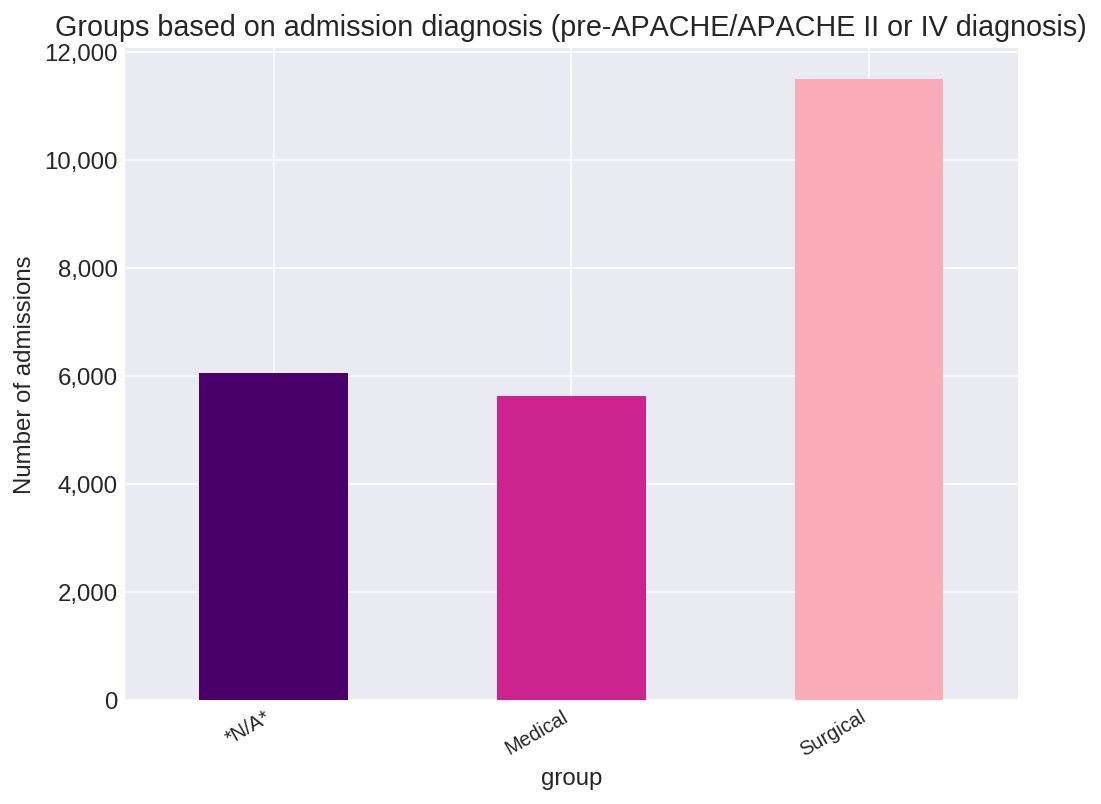

In [16]:
#plot the data
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(plotdata))
ax = plotdata.plot.bar(x=plotdata.columns[0],y=plotdata.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(title='Groups based on admission diagnosis (pre-APACHE/APACHE II or IV diagnosis)', ylabel=plotdata.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='small')

In [17]:
plotdata = combined_diagnoses[['diagnosis_group']].copy()
plotdata = plotdata.groupby('diagnosis_group').size().to_frame('number of admissions').sort_values(by='number of admissions', ascending=False).reset_index()
plotdata

,diagnosis_group,number of admissions
0,Thoraxchirurgie,3446
1,Interne geneeskunde,2347
2,Algemene chirurgie,2172
3,Operatief Cardiovasculair,1467
4,Post-operative cardiovascular,1422
...,...,...
33,Operatief Metabolisme,12
34,Post-operative metabolic,8
35,Non-operative musculo-skeletal,3
36,Operatief Hematologisch,3


In [18]:
sql = """
WITH diagnoses AS (
    SELECT admissionid,
            item, 
            value AS main_group,
            ROW_NUMBER() OVER(PARTITION BY admissionid
            ORDER BY measuredat DESC) AS rownum
    FROM listitems
    WHERE itemid IN (
        --MAIN GROUP - LEVEL 0
        13110, --D_Hoofdgroep
        16651, --DMC_Hoofdgroep, Medium Care
        
        18588, --Apache II Hoofdgroep
        16997 --APACHE IV Groepen
    )
)
SELECT admissionyeargroup AS admission_year, Count(*) AS number_of_patients, 
    Count(main_group) AS available_diagnosis_group, Count(*) - Count(main_group) AS Not_Available
FROM admissions
LEFT JOIN diagnoses on admissions.admissionid = diagnoses.admissionid
WHERE rownum = 1 OR rownum IS NULL --only last updated record
GROUP BY ROLLUP(admissionyeargroup)
ORDER BY admissionyeargroup;
"""
admissiondiagnosis = pd.read_gbq(sql, configuration=config)
admissiondiagnosis

,admission_year,number_of_patients,available_diagnosis_group,Not_Available
0,None,23172,17121,6051
1,2003-2009,9936,4459,5477
2,2010-2016,13236,12662,574


(array([0, 1]), <a list of 2 Text xticklabel objects>)

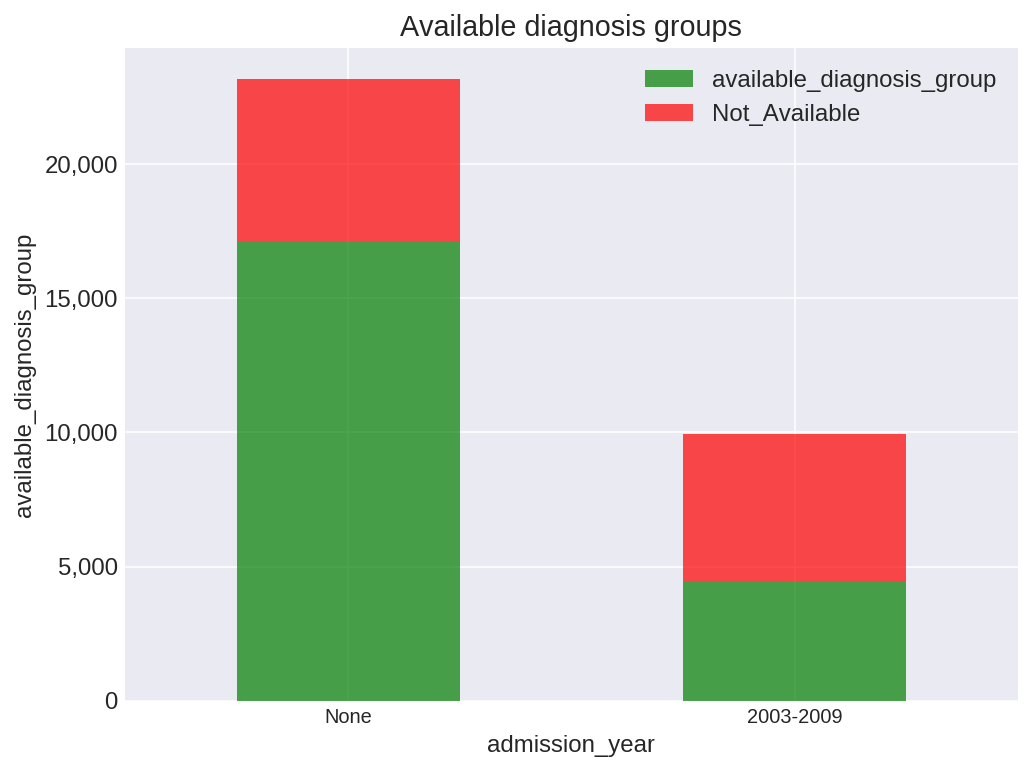

In [19]:
#plot the data
plotdata  = admissiondiagnosis[['admission_year','available_diagnosis_group', 'Not_Available']].iloc[0:-1]
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(plotdata.index))
ax = plotdata.plot.bar(x=plotdata.columns[0],y=plotdata.columns[[1,2]], stacked=True, legend=True,color=['g','r'], alpha=0.70)
ax.set(title='Available diagnosis groups', xlabel=plotdata.columns[0], ylabel=plotdata.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0, horizontalalignment='center',fontweight='light',fontsize='small')

## Pre-APACHE diagnosis groups

In [20]:
sql = """
WITH diagnoses AS (
    SELECT admissionid,
            item, 
            value AS main_group,
            ROW_NUMBER() OVER(PARTITION BY admissionid
            ORDER BY measuredat DESC) AS rownum
    FROM listitems
    WHERE itemid IN (
        13110, --D_Hoofdgroep
        16651 --DMC_Hoofdgroep
    )
)
SELECT admissionyeargroup AS admission_year, Count(admissions.admissionid) AS number_of_admissions, 
    Count(main_group) AS Available_Pre_APACHE_diagnosis_group, Count(admissions.admissionid) - Count(main_group) AS Not_Available
FROM admissions
LEFT JOIN diagnoses on admissions.admissionid = diagnoses.admissionid
WHERE rownum = 1 OR rownum IS NULL --only last updated record
GROUP BY ROLLUP(admissionyeargroup) --calculates a totals row
ORDER BY admissionyeargroup;
"""
admissiondiagnosis = pd.read_gbq(sql, configuration=config)
admissiondiagnosis

,admission_year,number_of_admissions,Available_Pre_APACHE_diagnosis_group,Not_Available
0,None,23172,17118,6054
1,2003-2009,9936,4457,5479
2,2010-2016,13236,12661,575


(array([0, 1]), <a list of 2 Text xticklabel objects>)

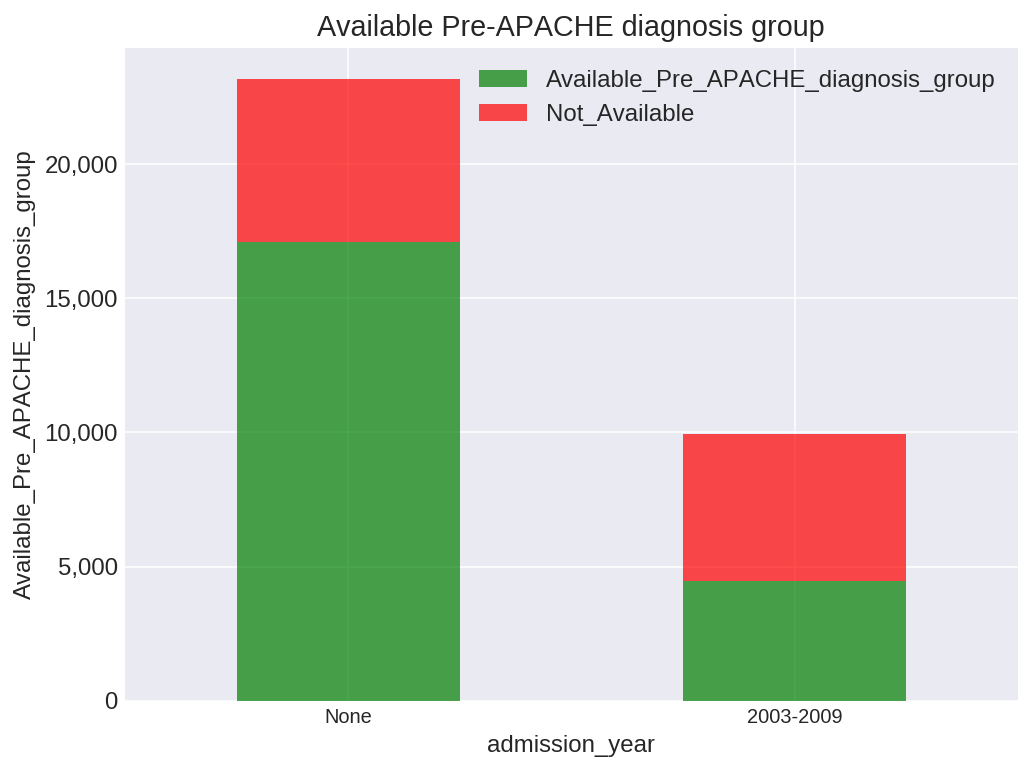

In [21]:
#plot the data
plotdata  = admissiondiagnosis[['admission_year','Available_Pre_APACHE_diagnosis_group', 'Not_Available']].iloc[0:-1]
ax = plotdata.plot.bar(x=plotdata.columns[0],y=plotdata.columns[[1,2]], stacked=True, legend=True,color=['g','r'], alpha=0.70)
ax.set(title='Available Pre-APACHE diagnosis group', xlabel=plotdata.columns[0], ylabel=plotdata.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0, horizontalalignment='center',fontweight='light',fontsize='small')

### Pre-APACHE diagnosis group levels: main group, subgroup, ICU admission diagnosis

In [22]:
sql = """
WITH diagnosis_groups AS (
SELECT admissionid,
        item, 
        value as diagnosis_group,
        ROW_NUMBER() OVER(PARTITION BY admissionid
        ORDER BY measuredat DESC) AS rownum
    FROM listitems
    WHERE itemid IN (
        --MAIN GROUP - LEVEL 0
        13110, --D_Hoofdgroep
        16651 --DMC_Hoofdgroep, Medium Care
    )
),diagnosis_subgroups AS (
SELECT admissionid,
        item, 
        value as diagnosis_subgroup,
        ROW_NUMBER() OVER(PARTITION BY admissionid
        ORDER BY measuredat DESC) AS rownum
    FROM listitems
    WHERE itemid IN (
        --SUB GROUP - LEVEL 1
        13111, --D_Subgroep_Thoraxchirurgie
        16669, --DMC_Subgroep_Thoraxchirurgie
        13112, --D_Subgroep_Algemene chirurgie
        16665, --DMC_Subgroep_Algemene chirurgie
        13113, --D_Subgroep_Neurochirurgie
        16667, --DMC_Subgroep_Neurochirurgie
        13114, --D_Subgroep_Neurologie
        16668, --DMC_Subgroep_Neurologie
        13115, --D_Subgroep_Interne geneeskunde
        16666 --DMC_Subgroep_Interne geneeskunde
    )
), diagnoses AS (
SELECT admissionid,
        item, 
        value as diagnosis,
        CASE 
            WHEN LOWER(item) LIKE '%chirurgie%' THEN 1
            ELSE 0
        END AS surgical,
        ROW_NUMBER() OVER(PARTITION BY admissionid
        ORDER BY measuredat DESC) AS rownum
FROM listitems
WHERE itemid IN (
        -- Diagnosis - LEVEL 2
        --SURGICAL
        13116, --D_Thoraxchirurgie_CABG en Klepchirurgie
        16671, --DMC_Thoraxchirurgie_CABG en Klepchirurgie
        13117, --D_Thoraxchirurgie_Cardio anders
        16672, --DMC_Thoraxchirurgie_Cardio anders
        13118, --D_Thoraxchirurgie_Aorta chirurgie
        16670, --DMC_Thoraxchirurgie_Aorta chirurgie
        13119, --D_Thoraxchirurgie_Pulmonale chirurgie
        16673, --DMC_Thoraxchirurgie_Pulmonale chirurgie

        13141, --D_Algemene chirurgie_Algemeen   
        16642, --DMC_Algemene chirurgie_Algemeen
        13121, --D_Algemene chirurgie_Buikchirurgie
        16643, --DMC_Algemene chirurgie_Buikchirurgie
        13123, --D_Algemene chirurgie_Endocrinologische chirurgie
        16644, --DMC_Algemene chirurgie_Endocrinologische chirurgie
        13145, --D_Algemene chirurgie_KNO/Overige
        16645, --DMC_Algemene chirurgie_KNO/Overige
        13125, --D_Algemene chirurgie_Orthopedische chirurgie
        16646, --DMC_Algemene chirurgie_Orthopedische chirurgie
        13122, --D_Algemene chirurgie_Transplantatie chirurgie
        16647, --DMC_Algemene chirurgie_Transplantatie chirurgie
        13124, --D_Algemene chirurgie_Trauma
        16648, --DMC_Algemene chirurgie_Trauma
        13126, --D_Algemene chirurgie_Urogenitaal
        16649, --DMC_Algemene chirurgie_Urogenitaal
        13120, --D_Algemene chirurgie_Vaatchirurgie
        16650, --DMC_Algemene chirurgie_Vaatchirurgie

        13128, --D_Neurochirurgie _Vasculair chirurgisch
        16661, --DMC_Neurochirurgie _Vasculair chirurgisch
        13129, --D_Neurochirurgie _Tumor chirurgie
        16660, --DMC_Neurochirurgie _Tumor chirurgie
        13130, --D_Neurochirurgie_Overige
        16662, --DMC_Neurochirurgie_Overige

        --MEDICAL
        13133, --D_Interne Geneeskunde_Cardiovasculair
        16653, --DMC_Interne Geneeskunde_Cardiovasculair
        13134, --D_Interne Geneeskunde_Pulmonaal
        16658, --DMC_Interne Geneeskunde_Pulmonaal
        13135, --D_Interne Geneeskunde_Abdominaal
        16652, --DMC_Interne Geneeskunde_Abdominaal
        13136, --D_Interne Geneeskunde_Infectieziekten
        16655, --DMC_Interne Geneeskunde_Infectieziekten
        13137, --D_Interne Geneeskunde_Metabool
        16656, --DMC_Interne Geneeskunde_Metabool
        13138, --D_Interne Geneeskunde_Renaal
        16659, --DMC_Interne Geneeskunde_Renaal
        13139, --D_Interne Geneeskunde_Hematologisch
        16654, --DMC_Interne Geneeskunde_Hematologisch
        13140, --D_Interne Geneeskunde_Overige
        16657, --DMC_Interne Geneeskunde_Overige

        13131, --D_Neurologie_Vasculair neurologisch
        16664, --DMC_Neurologie_Vasculair neurologisch
        13132, --D_Neurologie_Overige
        16663, --DMC_Neurologie_Overige

        13127 --D_KNO/Overige
        )
)
SELECT admissions.admissionid, admissionyeargroup AS admission_year, diagnosis, diagnosis_subgroup, diagnosis_group
FROM admissions
LEFT JOIN diagnoses on admissions.admissionid = diagnoses.admissionid
LEFT JOIN diagnosis_subgroups on admissions.admissionid = diagnosis_subgroups.admissionid
LEFT JOIN diagnosis_groups on admissions.admissionid = diagnosis_groups.admissionid
WHERE (diagnoses.rownum = 1 OR diagnoses.rownum IS NULL) AND 
    (diagnosis_subgroups.rownum = 1 OR diagnosis_subgroups.rownum IS NULL) AND
    (diagnosis_groups.rownum = 1 OR diagnosis_groups.rownum IS NULL) --only last updated record
    AND diagnosis IS NULL AND NOT diagnosis_group IS NULL
LIMIT 20
;
"""
items = pd.read_gbq(sql, configuration=config)
items.head(20)

,admissionid,admission_year,diagnosis,diagnosis_subgroup,diagnosis_group
0,14583,2010-2016,None,Overige,Neurologie
1,9188,2010-2016,None,None,Interne geneeskunde
2,9074,2010-2016,None,Pulmonaal,Interne geneeskunde
3,1569,2010-2016,None,Tumor chirurgie,Neurochirurgie
4,8871,2010-2016,None,CABG en Klepchirurgie,Thoraxchirurgie
5,10767,2010-2016,None,None,Thoraxchirurgie
6,13740,2010-2016,None,CABG en Klepchirurgie,Thoraxchirurgie
7,4233,2010-2016,None,Cardio anders,Thoraxchirurgie
8,22057,2010-2016,None,None,Thoraxchirurgie
9,12417,2010-2016,None,Vaatchirurgie,Algemene chirurgie


### Pre-APACHE sepsis

In [23]:
sql = """
WITH diagnoses AS (
    SELECT admissionid,
            item, 
            value AS sepsis,
            ROW_NUMBER() OVER(PARTITION BY admissionid
            ORDER BY measuredat DESC) AS rownum
    FROM listitems
    WHERE itemid IN (
        15808, --Opname Sepsis
        16675 --DMC_Opname Sepsis
    )
)
SELECT admissionyeargroup AS admission_year, sepsis
FROM admissions
LEFT JOIN diagnoses on admissions.admissionid = diagnoses.admissionid
WHERE rownum = 1 OR rownum IS NULL --only last updated record
"""
sepsis = pd.read_gbq(sql, configuration=config)
sepsis  

,admission_year,sepsis
0,2003-2009,None
1,2003-2009,None
2,2010-2016,Nee
3,2003-2009,None
4,2003-2009,None
...,...,...
23167,2003-2009,None
23168,2003-2009,None
23169,2010-2016,None
23170,2010-2016,Nee


In [24]:
plotdata = sepsis[['sepsis']].copy()
plotdata.loc[plotdata['sepsis'] == 'Ja', 'group'] = 'Sepsis'
plotdata.loc[plotdata['sepsis'] == 'Nee', 'group'] = 'No Sepsis'
plotdata.loc[plotdata['sepsis'].isna(), 'group'] = '*N/A*'
plotdata = plotdata.groupby('group').size().to_frame('Number of admissions').reset_index()
plotdata

,group,Number of admissions
0,*N/A*,9936
1,No Sepsis,11851
2,Sepsis,851


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

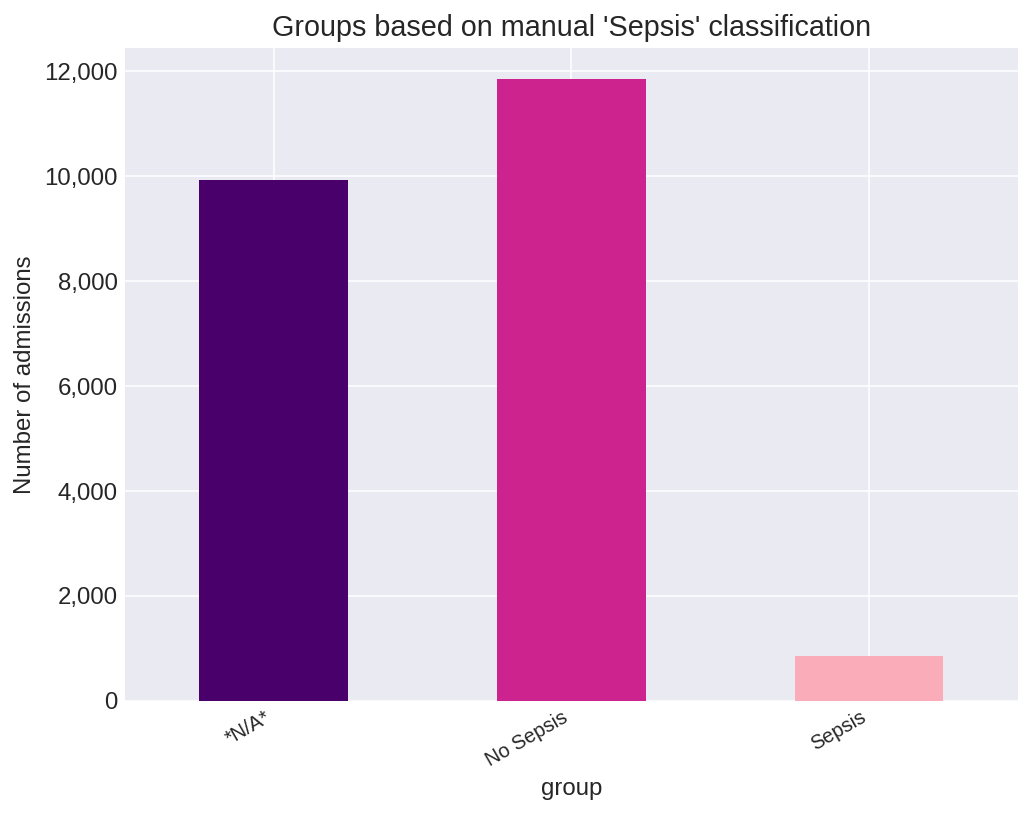

In [25]:
#plot the data
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(plotdata))
ax = plotdata.plot.bar(x=plotdata.columns[0],y=plotdata.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(title='Groups based on manual \'Sepsis\' classification', ylabel=plotdata.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='small')

## APACHE II or IV admission diagnosis

In [26]:
#show the most recent documented Apache II or IV diagnosis
sql = """
WITH apache AS (
    SELECT admissionid,
        item AS apache_group, 
        value AS apache_diagnosis,
        CASE 
            WHEN LOWER(item) LIKE '%non-operat%' THEN 0
            ELSE 1
        END AS surgical,
        ROW_NUMBER() OVER(PARTITION BY admissionid
        ORDER BY measuredat DESC) AS rownum --prioritize APACHE IV over APACHE II
    FROM listitems
   WHERE itemid IN (
        --18588, --Apache II Hoofdgroep
        18589, --Apache II Non-Operatief Cardiovasculair
        18590, --Apache II Non-Operatief Gastro-intestinaal
        18591, --Apache II Non-Operatief Hematologisch
        18592, --Apache II Non-Operatief Metabolisme
        18593, --Apache II Non-Operatief Neurologisch
        18594, --Apache II Non-Operatief Renaal
        18595, --Apache II Non-Operatief Respiratoir
        18596, --Apache II Operatief  Gastr-intenstinaal
        18597, --Apache II Operatief Cardiovasculair
        18598, --Apache II Operatief Hematologisch
        18599, --Apache II Operatief Metabolisme
        18600, --Apache II Operatief Neurologisch
        18601, --Apache II Operatief Renaal
        18602, --Apache II Operatief Respiratoir
        --16997, --APACHE IV Groepen
        16998, --APACHE IV Non-operative cardiovascular
        16999, --APACHE IV Non-operative Gastro-intestinal
        17000, --APACHE IV Non-operative genitourinary
        17001, --APACHEIV  Non-operative haematological
        17002, --APACHEIV  Non-operative metabolic
        17003, --APACHEIV Non-operative musculo-skeletal
        17004, --APACHEIV Non-operative neurologic
        17005, --APACHEIV Non-operative respiratory
        17006, --APACHEIV Non-operative transplant
        17007, --APACHEIV Non-operative trauma
        17008, --APACHEIV Post-operative cardiovascular
        17009, --APACHEIV Post-operative gastro-intestinal
        17010, --APACHEIV Post-operative genitourinary
        17011, --APACHEIV Post-operative hematology
        17012, --APACHEIV Post-operative metabolic
        17013, --APACHEIV Post-operative musculoskeletal /skin
        17014, --APACHEIV Post-operative neurologic
        17015, --APACHEIV Post-operative respiratory
        17016, --APACHEIV Post-operative transplant
        17017 --APACHEIV Post-operative trauma
        
        --- IGNORE Secondary Apache diagnoses and 'NICE'
        --18669, --NICE APACHEII diagnosen
        --18671, --NICE APACHEIV diagnosen
        --18670, --NICE SEC APACHEII diagnosen
        --18673, --NICE SEC APACHEIV diagnosen
        --18603, --SEC_Apache II Hoofdgroep
        --18604, --SEC_Apache II Non-Operatief Cardiovasculair
        --18605, --SEC_Apache II Non-Operatief Gastro-intestinaal
        --18606, --SEC_Apache II Non-Operatief Hematologisch
        --18607, --SEC_Apache II Non-Operatief Metabolisme
        --18608, --SEC_Apache II Non-Operatief Neurologisch
        --18609, --SEC_Apache II Non-Operatief Renaal
        --18610, --SEC_Apache II Non-Operatief Respiratoir
        --18611, --SEC_Apache II Operatief  Gastr-intenstinaal
        --18612, --SEC_Apache II Operatief Cardiovasculair
        --18613, --SEC_Apache II Operatief Hematologisch
        --18614, --SEC_Apache II Operatief Metabolisme
        --18615, --SEC_Apache II Operatief Neurologisch
        --18616, --SEC_Apache II Operatief Renaal
        --18617, --SEC_Apache II Operatief Respiratoir
        --17018, --SEC_APACHE IV Groepen
        --17019, --SEC_APACHE IV Non-operative cardiovascular
        --17020, --SEC_APACHE IV Non-operative Gastro-intestinal
        --17021, --SEC_APACHE IV Non-operative genitourinary
        --17022, --SEC_APACHEIV  Non-operative haematological
        --17023, --SEC_APACHEIV  Non-operative metabolic
        --17024, --SEC_APACHEIV Non-operative musculo-skeletal
        --17025, --SEC_APACHEIV Non-operative neurologic
        --17026, --SEC_APACHEIV Non-operative respiratory
        --17027, --SEC_APACHEIV Non-operative transplant
        --17028, --SEC_APACHEIV Non-operative trauma
        --17029, --SEC_APACHEIV Post-operative cardiovascular
        --17030, --SEC_APACHEIV Post-operative gastro-intestinal
        --17031, --SEC_APACHEIV Post-operative genitourinary
        --17032, --SEC_APACHEIV Post-operative hematology
        --17033, --SEC_APACHEIV Post-operative metabolic
        --17034, --SEC_APACHEIV Post-operative musculoskeletal /skin
        --17035, --SEC_APACHEIV Post-operative neurologic
        --17036, --SEC_APACHEIV Post-operative respiratory
        --17037, --SEC_APACHEIV Post-operative transplant
        --17038 --SEC_APACHEIV Post-operative trauma
        ) 
    )
    
SELECT admissionyeargroup AS admission_year, Count(*) AS number_of_patients, 
    Count(apache_diagnosis) AS available_APACHE_II_IV_diagnoses, Count(*) - Count(apache_diagnosis) AS Not_Available
FROM admissions
LEFT JOIN apache on admissions.admissionid = apache.admissionid
WHERE rownum = 1 OR rownum IS NULL --only last updated record, APACHE IV prioritized over APACHE II
GROUP BY ROLLUP(admissionyeargroup)
ORDER BY admissionyeargroup;
"""
admissiondiagnosis = pd.read_gbq(sql, configuration=config)
admissiondiagnosis

,admission_year,number_of_patients,available_APACHE_II_IV_diagnoses,Not_Available
0,None,23172,8928,14244
1,2003-2009,9936,164,9772
2,2010-2016,13236,8764,4472


(array([0, 1]), <a list of 2 Text xticklabel objects>)

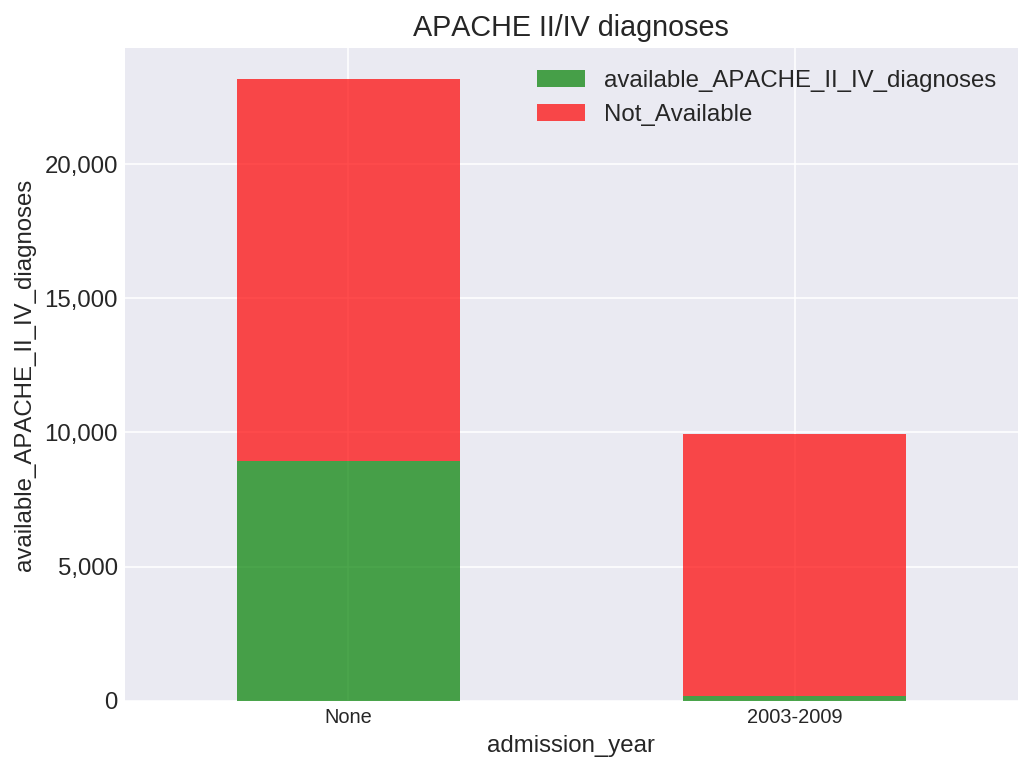

In [27]:
#plot the data
plotdata  = admissiondiagnosis[['admission_year','available_APACHE_II_IV_diagnoses', 'Not_Available']].iloc[0:-1]
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(plotdata.index))
ax = plotdata.plot.bar(x=plotdata.columns[0],y=plotdata.columns[[1,2]], stacked=True, legend=True,color=['g','r'], alpha=0.70)
ax.set(title='APACHE II/IV diagnoses', xlabel=plotdata.columns[0], ylabel=plotdata.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0, horizontalalignment='center',fontweight='light',fontsize='small')

### APACHE II or IV surgical admissions

In [28]:
#show the most recent documented Apache II or IV diagnosis
sql = """
WITH apache AS (
    SELECT admissionid,
        item AS apache_group, 
        value AS apache_diagnosis,
        CASE 
            WHEN LOWER(item) LIKE '%non-operat%' THEN 0
            ELSE 1
        END AS surgical,
        ROW_NUMBER() OVER(PARTITION BY admissionid
        ORDER BY measuredat DESC) AS rownum --prioritize APACHE IV over APACHE II
    FROM listitems
   WHERE itemid IN (
        --18588, --Apache II Hoofdgroep
        18589, --Apache II Non-Operatief Cardiovasculair
        18590, --Apache II Non-Operatief Gastro-intestinaal
        18591, --Apache II Non-Operatief Hematologisch
        18592, --Apache II Non-Operatief Metabolisme
        18593, --Apache II Non-Operatief Neurologisch
        18594, --Apache II Non-Operatief Renaal
        18595, --Apache II Non-Operatief Respiratoir
        18596, --Apache II Operatief  Gastr-intenstinaal
        18597, --Apache II Operatief Cardiovasculair
        18598, --Apache II Operatief Hematologisch
        18599, --Apache II Operatief Metabolisme
        18600, --Apache II Operatief Neurologisch
        18601, --Apache II Operatief Renaal
        18602, --Apache II Operatief Respiratoir
        --16997, --APACHE IV Groepen
        16998, --APACHE IV Non-operative cardiovascular
        16999, --APACHE IV Non-operative Gastro-intestinal
        17000, --APACHE IV Non-operative genitourinary
        17001, --APACHEIV  Non-operative haematological
        17002, --APACHEIV  Non-operative metabolic
        17003, --APACHEIV Non-operative musculo-skeletal
        17004, --APACHEIV Non-operative neurologic
        17005, --APACHEIV Non-operative respiratory
        17006, --APACHEIV Non-operative transplant
        17007, --APACHEIV Non-operative trauma
        17008, --APACHEIV Post-operative cardiovascular
        17009, --APACHEIV Post-operative gastro-intestinal
        17010, --APACHEIV Post-operative genitourinary
        17011, --APACHEIV Post-operative hematology
        17012, --APACHEIV Post-operative metabolic
        17013, --APACHEIV Post-operative musculoskeletal /skin
        17014, --APACHEIV Post-operative neurologic
        17015, --APACHEIV Post-operative respiratory
        17016, --APACHEIV Post-operative transplant
        17017 --APACHEIV Post-operative trauma
        
        --- IGNORE Secondary Apache diagnoses and 'NICE'
        --18669, --NICE APACHEII diagnosen
        --18671, --NICE APACHEIV diagnosen
        --18670, --NICE SEC APACHEII diagnosen
        --18673, --NICE SEC APACHEIV diagnosen
        --18603, --SEC_Apache II Hoofdgroep
        --18604, --SEC_Apache II Non-Operatief Cardiovasculair
        --18605, --SEC_Apache II Non-Operatief Gastro-intestinaal
        --18606, --SEC_Apache II Non-Operatief Hematologisch
        --18607, --SEC_Apache II Non-Operatief Metabolisme
        --18608, --SEC_Apache II Non-Operatief Neurologisch
        --18609, --SEC_Apache II Non-Operatief Renaal
        --18610, --SEC_Apache II Non-Operatief Respiratoir
        --18611, --SEC_Apache II Operatief  Gastr-intenstinaal
        --18612, --SEC_Apache II Operatief Cardiovasculair
        --18613, --SEC_Apache II Operatief Hematologisch
        --18614, --SEC_Apache II Operatief Metabolisme
        --18615, --SEC_Apache II Operatief Neurologisch
        --18616, --SEC_Apache II Operatief Renaal
        --18617, --SEC_Apache II Operatief Respiratoir
        --17018, --SEC_APACHE IV Groepen
        --17019, --SEC_APACHE IV Non-operative cardiovascular
        --17020, --SEC_APACHE IV Non-operative Gastro-intestinal
        --17021, --SEC_APACHE IV Non-operative genitourinary
        --17022, --SEC_APACHEIV  Non-operative haematological
        --17023, --SEC_APACHEIV  Non-operative metabolic
        --17024, --SEC_APACHEIV Non-operative musculo-skeletal
        --17025, --SEC_APACHEIV Non-operative neurologic
        --17026, --SEC_APACHEIV Non-operative respiratory
        --17027, --SEC_APACHEIV Non-operative transplant
        --17028, --SEC_APACHEIV Non-operative trauma
        --17029, --SEC_APACHEIV Post-operative cardiovascular
        --17030, --SEC_APACHEIV Post-operative gastro-intestinal
        --17031, --SEC_APACHEIV Post-operative genitourinary
        --17032, --SEC_APACHEIV Post-operative hematology
        --17033, --SEC_APACHEIV Post-operative metabolic
        --17034, --SEC_APACHEIV Post-operative musculoskeletal /skin
        --17035, --SEC_APACHEIV Post-operative neurologic
        --17036, --SEC_APACHEIV Post-operative respiratory
        --17037, --SEC_APACHEIV Post-operative transplant
        --17038 --SEC_APACHEIV Post-operative trauma
        ) 
    )
    
SELECT admissionyeargroup AS admission_year, apache_diagnosis, surgical
FROM admissions
LEFT JOIN apache on admissions.admissionid = apache.admissionid
WHERE rownum = 1 OR rownum IS NULL --only last updated record, APACHE IV prioritized over APACHE II
"""
admissiondiagnosis = pd.read_gbq(sql, configuration=config)
admissiondiagnosis.head(10)

,admission_year,apache_diagnosis,surgical
0,2010-2016,Hypertensie,0.0
1,2010-2016,"Aneurysm, abdominal aortic; with rupture",1.0
2,2010-2016,Cystectomy for neoplasm,1.0
3,2010-2016,Transphenoidal surgery,1.0
4,2010-2016,"Pneumonia, other",0.0
5,2010-2016,"Hemorrhage/hematoma, intracranial",0.0
6,2010-2016,"Bleeding, upper GI",0.0
7,2010-2016,Cranioplasty and complications from previous craniotomies,1.0
8,2010-2016,"Rhythm disturbance (atrial, supraventricular)",0.0
9,2010-2016,Thoracotomy for other reasons,1.0


In [29]:
surgical = admissiondiagnosis[admissiondiagnosis['surgical'] == 1].groupby('apache_diagnosis').size().to_frame('number of admissions').sort_values('number of admissions', ascending=False).reset_index().head(10)
surgical

,apache_diagnosis,number of admissions
0,Chron. cardiovasculaire ziekte,785
1,"CABG alone, coronary artery bypass grafting",760
2,Cardiovasculair,364
3,Hartkleppen,356
4,Aortic valve replacement (isolated),210
5,Craniotomie voor neoplasma,176
6,Gastro-intestinaal voor neoplasma,150
7,"Neoplasm-cranial, surgery for (excluding transphenoidal)",140
8,Neurologisch,119
9,Perifeer vasculair,117


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

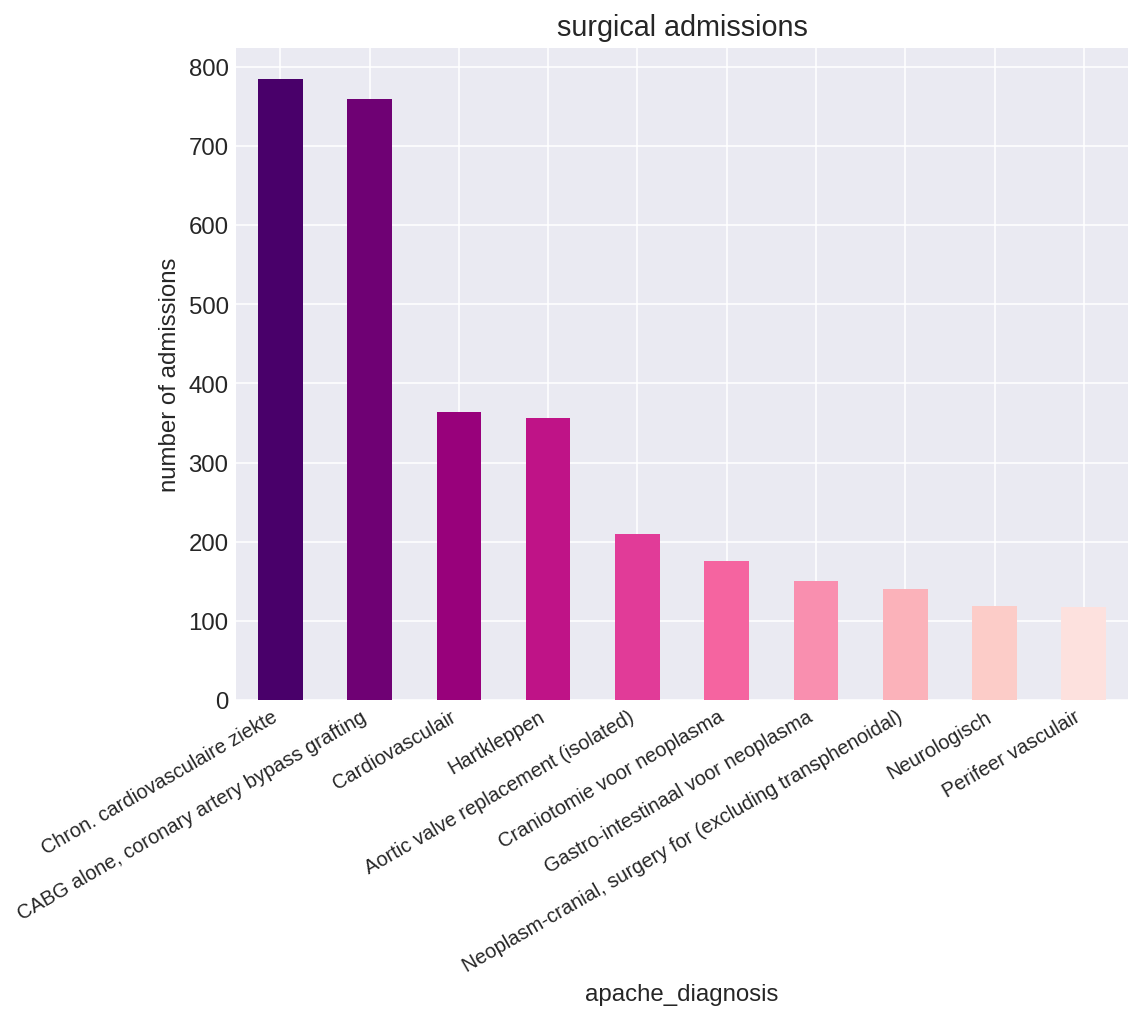

In [30]:
#plot the data
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(surgical.index))
ax = surgical.plot.bar(x=surgical.columns[0],y=surgical.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(title='surgical admissions', ylabel=surgical.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='small')

### APACHE II or IV medical admissions

In [31]:
medical = admissiondiagnosis[admissiondiagnosis['surgical'] == 0]
medical.head()

,admission_year,apache_diagnosis,surgical
0,2010-2016,Hypertensie,0.0
4,2010-2016,"Pneumonia, other",0.0
5,2010-2016,"Hemorrhage/hematoma, intracranial",0.0
6,2010-2016,"Bleeding, upper GI",0.0
8,2010-2016,"Rhythm disturbance (atrial, supraventricular)",0.0


In [32]:
medical = admissiondiagnosis[admissiondiagnosis['surgical'] == 0].groupby('apache_diagnosis').size().to_frame('number of admissions').sort_values('number of admissions', ascending=False).reset_index().head(10)
medical

,apache_diagnosis,number of admissions
0,Na cardiac arrest,266
1,Cardiac arrest (with or without respiratory arrest;,246
2,Respiratoir,217
3,Respiratoire infectie,176
4,Sepsis,119
5,Hoofdtrauma,103
6,Neurologisch,98
7,"Pneumonia, bacterial",91
8,"CHF, congestive heart failure",75
9,Congestief hart falen,71


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

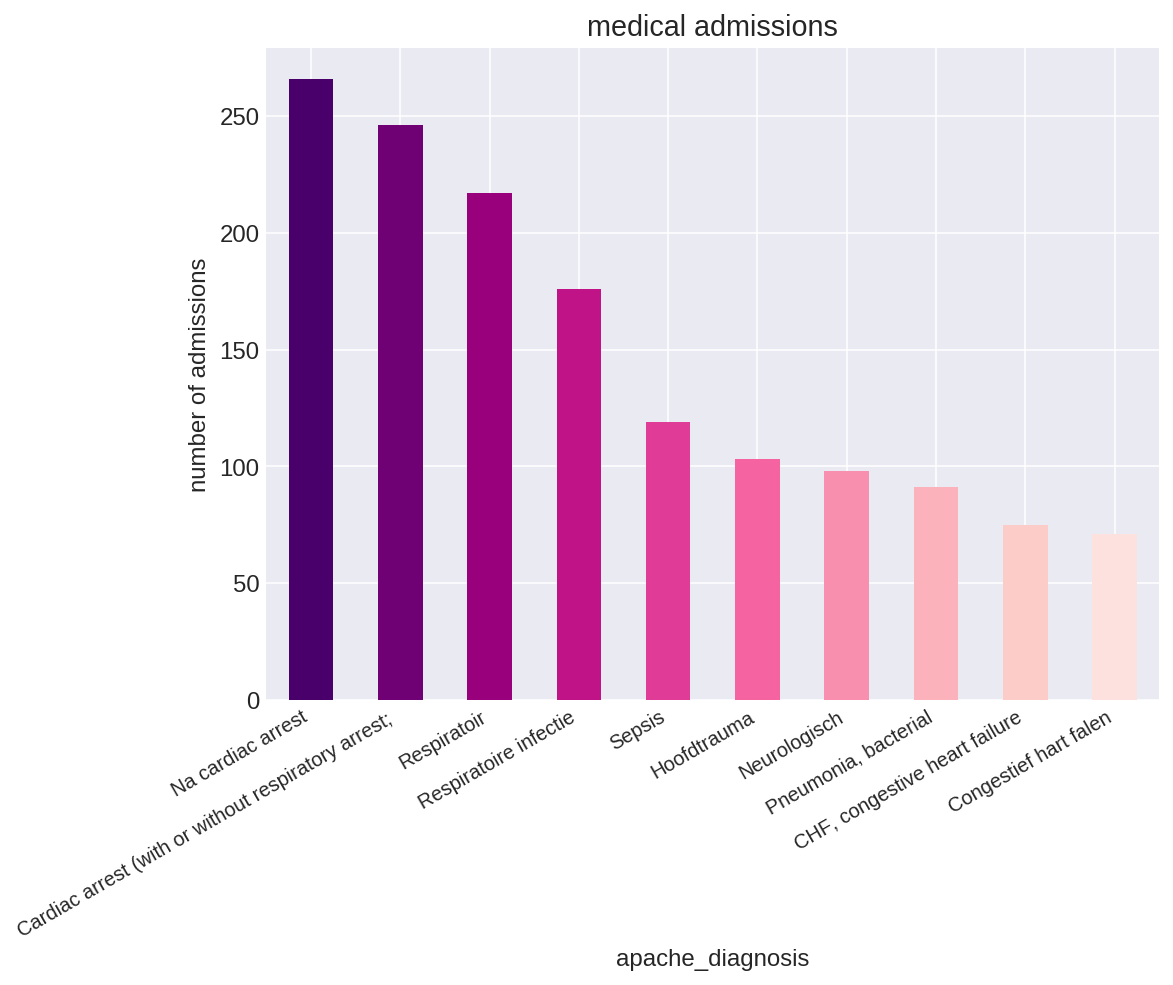

In [33]:
#plot the data
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(medical.index))
ax = medical.plot.bar(x=medical.columns[0],y=medical.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(title='medical admissions', ylabel=medical.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='small')

In [34]:
plotdata = admissiondiagnosis[['surgical']].copy()
plotdata.loc[plotdata['surgical'] == 1, 'group'] = 'Surgical'
plotdata.loc[plotdata['surgical'] == 0, 'group'] = 'Medical'
plotdata.loc[plotdata['surgical'].isna(), 'group'] = '*N/A*'
plotdata = plotdata.groupby('group').size().to_frame('Number of admissions').reset_index()
plotdata

,group,Number of admissions
0,*N/A*,14244
1,Medical,3525
2,Surgical,5403


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

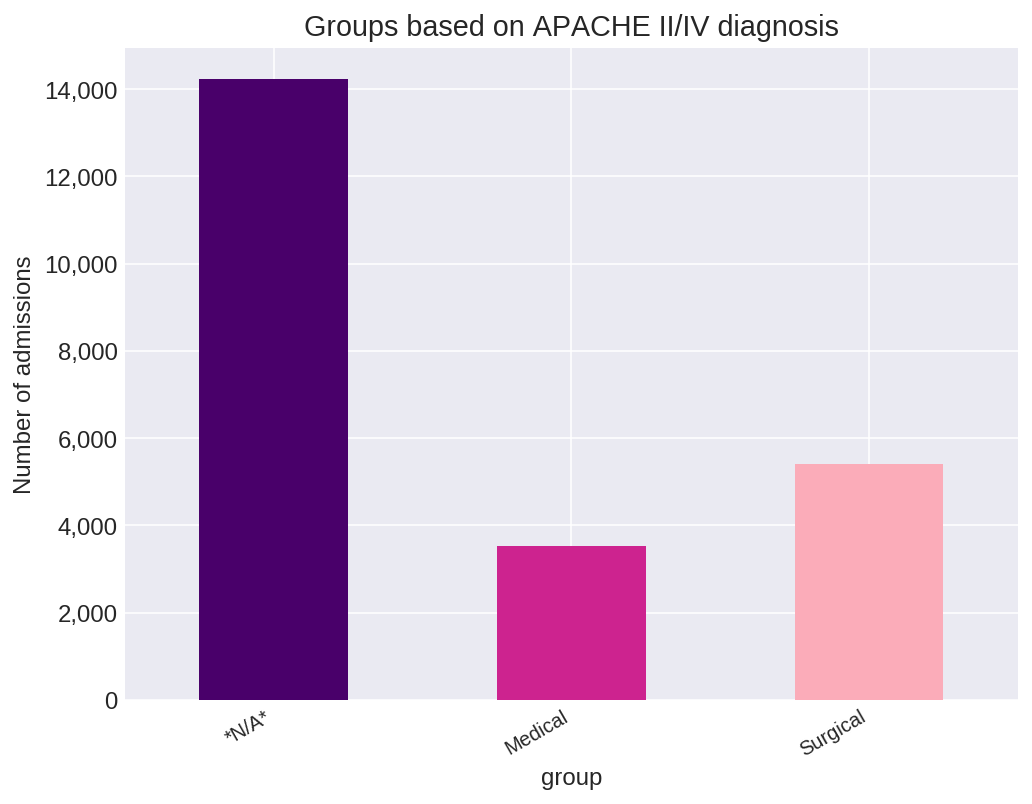

In [35]:
#plot the data
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(plotdata))
ax = plotdata.plot.bar(x=plotdata.columns[0],y=plotdata.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(title='Groups based on APACHE II/IV diagnosis', ylabel=plotdata.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, horizontalalignment='right',fontweight='light',fontsize='small')